In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("/content/IRIS.csv")

# Understanding Data


In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

In [6]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Handling Nulls


In [7]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There is no nulls

# Handling Duplicates

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [9]:
data.duplicated().sum()

3

In [10]:
print(data[data.duplicated()])

     sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica


In [11]:
#data = data.drop_duplicates()

In [12]:
data.duplicated().sum()

3

In [13]:
data.shape

(150, 5)

removing duplicates decrease the accueact so we will keep it

# Handling Outliers

In [14]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

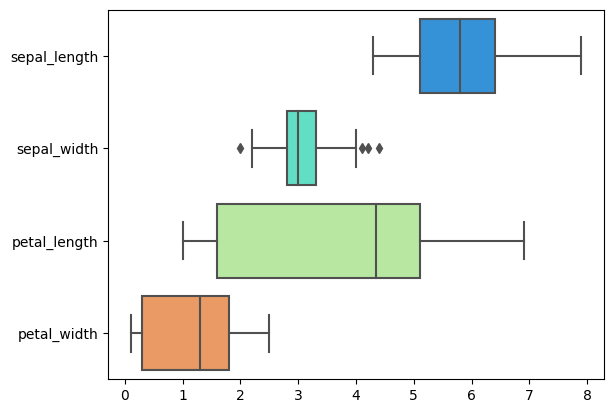

In [15]:
sns.boxplot(data=data,palette='rainbow',orient='h')

<Axes: xlabel='sepal_width'>

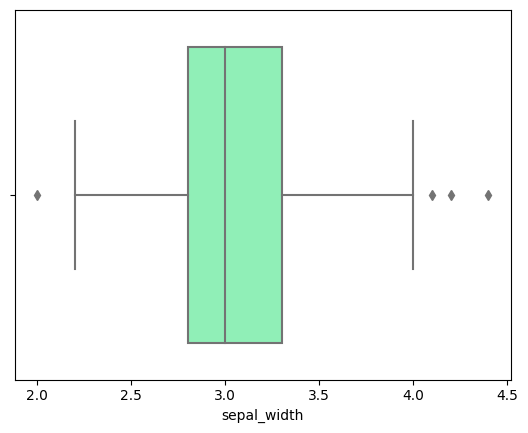

In [16]:
sns.boxplot(data=data,x='sepal_width',palette='rainbow',orient='h')

# Handling String Data

In [17]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [18]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
data['species']=data['species'].replace("Iris-versicolor",1)
data['species']=data['species'].replace('Iris-virginica',2)
data['species']=data['species'].replace('Iris-setosa',3)

In [20]:
data['species'].value_counts()

3    50
1    50
2    50
Name: species, dtype: int64

#EDA

Text(0, 0.5, 'No. of species')

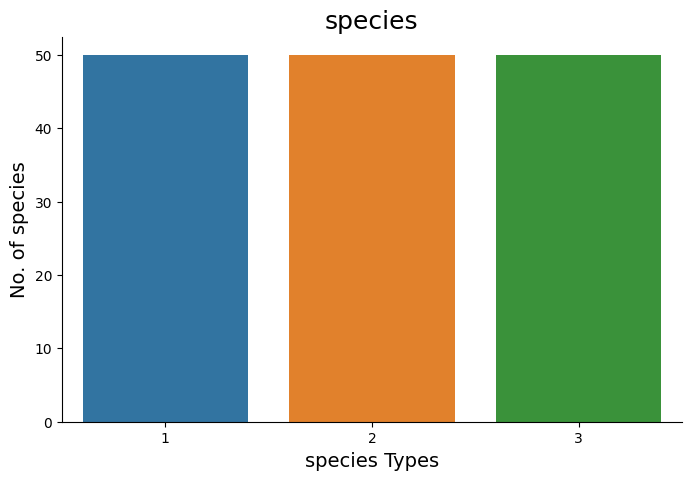

In [21]:
#relation between status & no.of trips
plt.figure(figsize=(8, 5))
g = sns.countplot(x="species", data=data)
sns.despine()
plt.title("species", fontsize = 18)
plt.xlabel("species Types", fontsize = 14)
plt.ylabel("No. of species", fontsize = 14)

Text(0, 0.5, 'Counts')

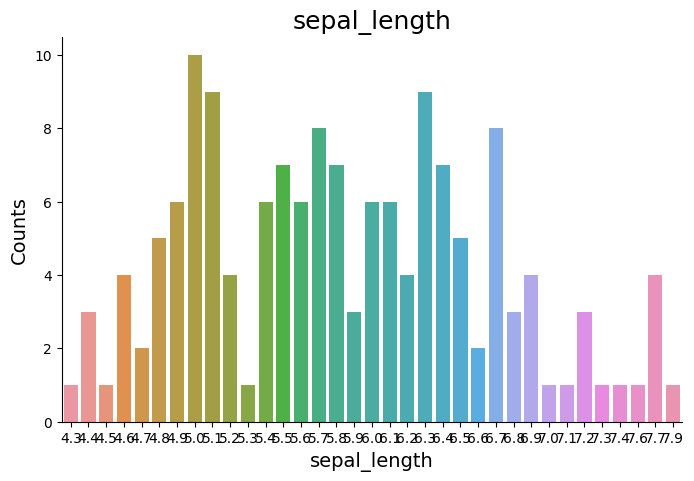

In [22]:
#relation between status & no.of trips
plt.figure(figsize=(8, 5))
g = sns.countplot(x="sepal_length", data=data)
sns.despine()
plt.title("sepal_length", fontsize = 18)
plt.xlabel("sepal_length", fontsize = 14)
plt.ylabel("Counts", fontsize = 14)

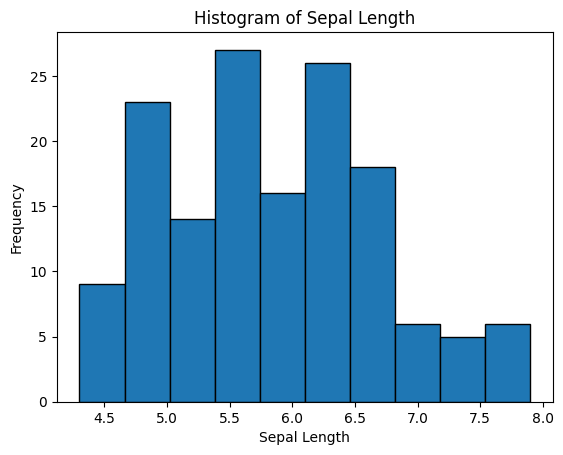

In [23]:
plt.hist(data['sepal_length'], bins=10, edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()


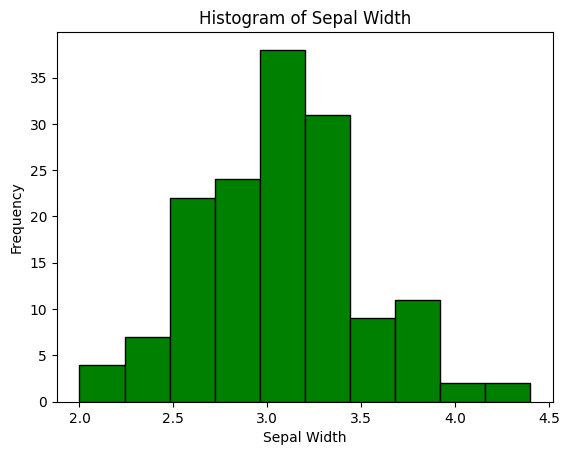

In [24]:
plt.hist(data['sepal_width'], bins=10, edgecolor='black', color='green')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Width')
plt.show()

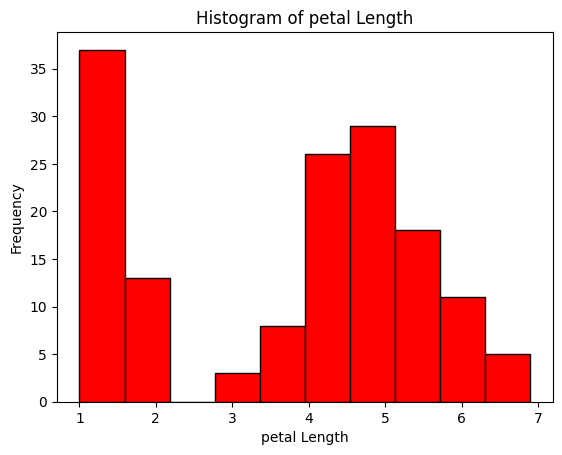

In [25]:
plt.hist(data['petal_length'], bins=10, color='red',edgecolor='black')
plt.xlabel('petal Length')
plt.ylabel('Frequency')
plt.title('Histogram of petal Length')
plt.show()

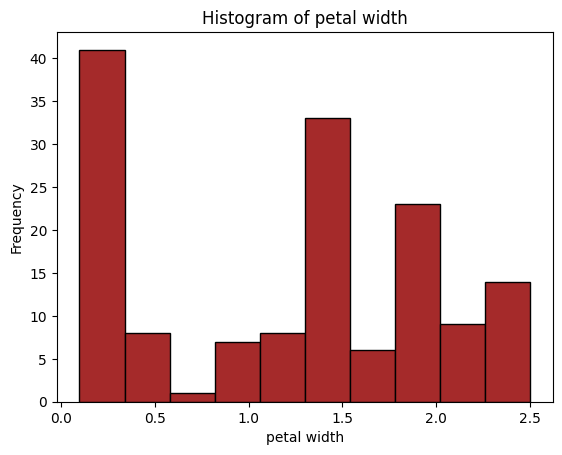

In [26]:
plt.hist(data['petal_width'], bins=10, color='brown',edgecolor='black')
plt.xlabel('petal width')
plt.ylabel('Frequency')
plt.title('Histogram of petal width')
plt.show()

In [27]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.460039
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.612165
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.649101
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.580749
species,-0.460039,0.612165,-0.649101,-0.580749,1.000000


<Axes: >

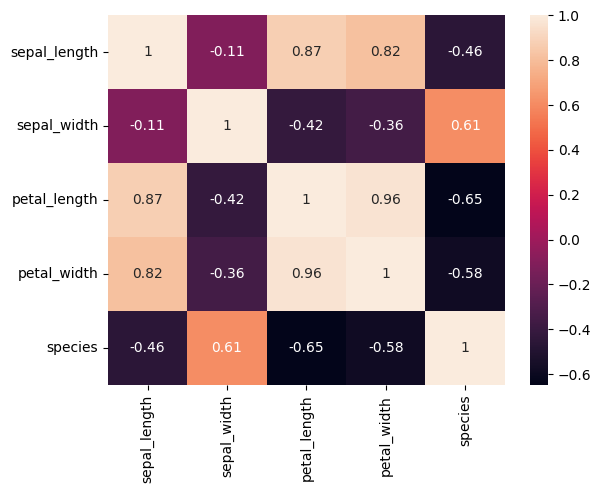

In [28]:
sns.heatmap(data.corr(),annot=True)

In [29]:
abs(data.corr()["species"])

sepal_length    0.460039
sepal_width     0.612165
petal_length    0.649101
petal_width     0.580749
species         1.000000
Name: species, dtype: float64

In [30]:
#data.drop(['sepal_length'],axis=1,inplace=True)

In [31]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

droping one column decrease the accuracy so we keep it

# Spliting data into train and test

In [32]:
X=data.drop(['species'],axis=1,inplace=False)

Y=data['species']

In [33]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state= 42 , shuffle = True)
print('X_train Shape is',X_train.shape)
print('X_test Shape is',X_test.shape)
print('Y_train Shape is',Y_train.shape)
print('Y_test Shape is',y_test.shape)

X_train Shape is (105, 4)
X_test Shape is (45, 4)
Y_train Shape is (105,)
Y_test Shape is (45,)


# Appling Models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import f1_score, precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [36]:
model_Log = LogisticRegression(solver = 'liblinear' , C = 305667 , random_state = 42 )
model_Dec = DecisionTreeClassifier()
model_Random = RandomForestClassifier()
model_SVC=LinearSVC()

In [37]:
model_Log.fit(X_train , Y_train)
model_Dec.fit(X_train , Y_train)
model_Random.fit(X_train , Y_train)
model_SVC.fit(X_train , Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [38]:
y_Pred_Test_Log = model_Log.predict(X_test)
y_pred_Train_Log=model_Log.predict(X_train)

y_Pred_Test_Dec = model_Dec.predict(X_test)
y_pred_Train_Dec=model_Dec.predict(X_train)

y_Pred_Test_Random = model_Random.predict(X_test)
y_pred_Train_Random=model_Random.predict(X_train)


y_Pred_Test_SVC = model_SVC.predict(X_test)
y_pred_Train_SVC=model_SVC.predict(X_train)

In [39]:
print("Logistic Regression")
accuracy = accuracy_score(Y_train,y_pred_Train_Log )
print("Train: ",accuracy)
accuracy = accuracy_score(y_test,y_Pred_Test_Log)
print("Test:" , accuracy)
print()
print("Decision Tree")
accuracy = accuracy_score(Y_train,y_pred_Train_Dec )
print("Train: ",accuracy)
accuracy = accuracy_score(y_test,y_Pred_Test_Dec)
print("Test:" , accuracy)
print()
print("Random Forest")
accuracy = accuracy_score(Y_train,y_pred_Train_Random )
print("Train: ",accuracy)
accuracy = accuracy_score(y_test,y_Pred_Test_Random)
print("Test:" , accuracy)
print()
print("SVC")
accuracy = accuracy_score(Y_train,y_pred_Train_SVC )
print("Train: ",accuracy)
accuracy = accuracy_score(y_test,y_Pred_Test_SVC)
print("Test:" , accuracy)

Logistic Regression
Train:  0.9714285714285714
Test: 1.0

Decision Tree
Train:  1.0
Test: 1.0

Random Forest
Train:  1.0
Test: 1.0

SVC
Train:  0.9619047619047619
Test: 1.0
